# Create Normal Distribution
* Draw random samples from a normal (Gaussian) distribution.
np.random.normal(loc = mu, scale = sigma, size = 1000)

* The probability density for the Gaussian distribution is

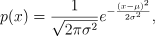
where mu is the mean and sigma the standard deviation. The square of the standard deviation, \sigma^2, is called the variance.

In [1]:
from numpy.random import normal as nr
mu, sigma = 0, 0.2
s = nr(mu, sigma, 1000)


In [5]:
# Verify mean and sigma
import numpy as np
(mu - np.mean(s))<.01

True

In [6]:
(sigma - np.std(s))<.01

True

Display the histogram of the samples, along with the probability density function:

(array([0.04931323, 0.09862646, 0.12328307, 0.29587938, 0.34519261,
        0.39450584, 0.6657286 , 0.64107199, 1.33145721, 1.20817413,
        1.79993289, 2.02184243, 2.21909535, 2.02184243, 1.6519932 ,
        1.82458951, 1.67664982, 1.45474028, 1.03557783, 0.96160798,
        0.86298152, 0.51778891, 0.61641537, 0.34519261, 0.22190953,
        0.09862646, 0.07396984, 0.07396984, 0.        , 0.02465661]),
 array([-0.56938938, -0.52883231, -0.48827524, -0.44771818, -0.40716111,
        -0.36660404, -0.32604697, -0.2854899 , -0.24493284, -0.20437577,
        -0.1638187 , -0.12326163, -0.08270457, -0.0421475 , -0.00159043,
         0.03896664,  0.0795237 ,  0.12008077,  0.16063784,  0.20119491,
         0.24175197,  0.28230904,  0.32286611,  0.36342318,  0.40398024,
         0.44453731,  0.48509438,  0.52565145,  0.56620852,  0.60676558,
         0.64732265]),
 <a list of 30 Patch objects>)

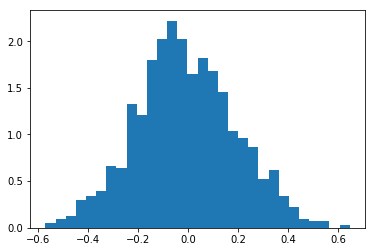

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(s, 30, density=True)                                                                                                                                                                                        

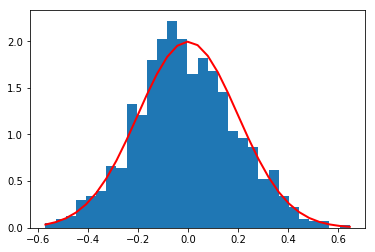

In [12]:
count, bins, ignored = plt.hist(s, 30, density=True)
pdf = 1/(np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(bins-mu)**2/(2 * sigma**2))
plt.plot(bins, pdf, linewidth=2, color='r')

# Plot Grouped Histogram

In [1]:
from pandas import DataFrame
import numpy as np
x = ['A']*300 + ['B']*400 + ['C']*300
y = np.random.randn(1000)
df = DataFrame({'Letter':x, 'N':y})
df.head()

,Letter,N
0,A,-0.251479
1,A,0.787182
2,A,0.640347
3,A,1.939023
4,A,0.931624


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D187A86710>,
      dtype=object)

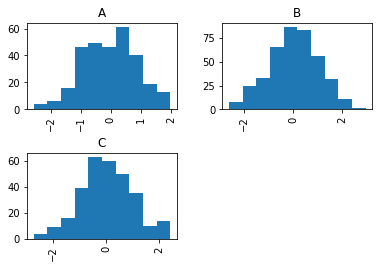

In [5]:
df['N'].hist(by=df['Letter'])

# Plot Logistic Function

'done'

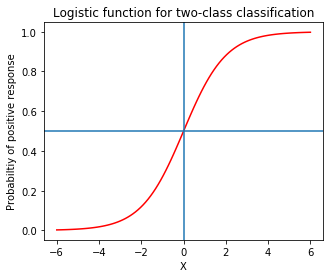

In [13]:
def plot_logistic(upper = 6, lower = -6, steps = 100):
    import matplotlib.pyplot as plt
    import pandas as pd
    import math as m
    step = float(upper - lower)  / float(steps)
    x = [lower + x * step for x in range(101)]
    y = [m.exp(z)/(1 + m.exp(z)) for z in x]
    
    fig = plt.figure(figsize=(5, 4))
    fig.clf()
    ax = fig.gca()
    ax.plot(x, y, color = 'r')
    ax.axvline(0, 0.0, 1.0)
    ax.axhline(0.5, lower, upper)
    ax.set_xlabel('X')
    ax.set_ylabel('Probabiltiy of positive response')
    ax.set_title('Logistic function for two-class classification')
    return 'done'

plot_logistic()

# Plot Log function and Entropy

C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log2
C:\ProgramData\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


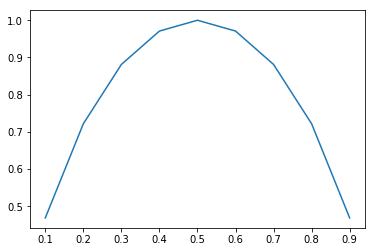

In [60]:
import numpy as np
import matplotlib.pyplot as plt
n = 1000
y=[]
x=[]
for i in np.arange(0.1,1.1, .1):
    y.append(-i * np.log2(i)-(1-i) * np.log2(1-i))
    x.append(i)
# x = [1/(x+1) for x in range(100)]
# x.sort(reverse=False)
# x = np.asarray(x)
# y.shape
# x = x.reshape(-1,1)
plt.plot(x,y)
# list(zip(x,y))


# Decision Tree Regressor With ADABOOST
A decision tree is boosted using the AdaBoost.R2 algorithm on a 1D sinusoidal dataset with a small amount of Gaussian noise. 299 boosts (300 decision trees) is compared with a single decision tree regressor. As the number of boosts is increased the regressor can fit more detail.

Automatically created module for IPython interactive environment


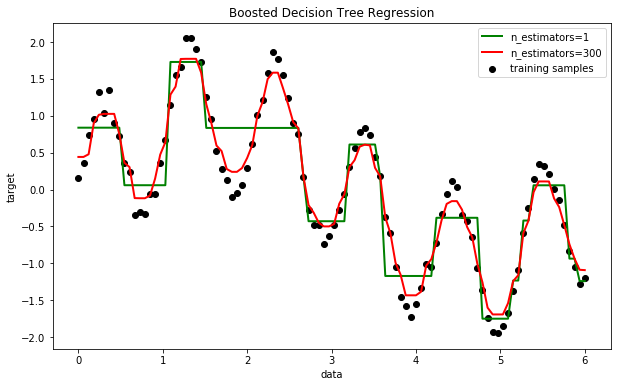

In [3]:
print(__doc__)

# Author: Noel Dawe <noel.dawe@gmail.com>
#
# License: BSD 3 clause

# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()